In [ ]:
"""
11/23
Purpose: To analyze the fashion dataset using tree based methods

"""

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
#!git clone https://github.com/celiibrendan/fashion-mnist.git

In [3]:
from os import sys
sys.path.append("/fashion-mnist/utils/")
sys.path.append("../../../machine_learning_tools/")

In [4]:
import sklearn_models as sklm
import sklearn_utils as sklu
import numpy_ml as nu
import general_utils as gu

# loads the fashion dataset

In [5]:
import mnist_reader
X_train, y_train = mnist_reader.load_mnist('/fashion-mnist/data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('/fashion-mnist/data/fashion', kind='t10k')

In [6]:
X_train.shape

(60000, 784)

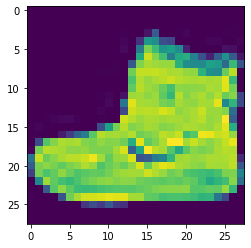

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0].reshape(28,28))

# Part D: Trying to Tune Models for Accuracy (Decision Tree)

In [9]:
 """
Purpose:  
Accuracy. Now properly tune each approach and compare and contrast the test accuracy of each
method. Which performs best? Why? What hyperparameters led to the best test error? How
long did each approach take to train? (Note: If you did the Deep Learning problem, also compare
your accuracy and timing to that of the Deep Learning methods above.)

Pseudocode: 
0) Determine all parameters we want to set or inspect over and define
1) Define the RandomizedSearchCV for the models
2) Run the RandomizedSearchCV: 
- record the testing error
- record the time it took
3) Compare the 

"""


'\nPurpose:  \nAccuracy. Now properly tune each approach and compare and contrast the test accuracy of each\nmethod. Which performs best? Why? What hyperparameters led to the best test error? How\nlong did each approach take to train? (Note: If you did the Deep Learning problem, also compare\nyour accuracy and timing to that of the Deep Learning methods above.)\n\nPseudocode: \n0) Determine all parameters we want to set or inspect over and define\n1) Define the RandomizedSearchCV for the models\n2) Run the RandomizedSearchCV: \n- record the testing error\n- record the time it took\n3) Compare the \n\n'

In [67]:
param_dict = {
    "max_depth": np.linspace(5,40,100).astype('int'),
}

model_name = "DecisionTreeClassifier"

clf = sklm.DecisionTreeClassifier()

In [39]:
import hyperparameters_ml as hml
best_param, cv_results = hml.best_hyperparams_RandomizedSearchCV(
    clf,
    parameter_dict=param_dict,
    X = X_train,
    y = y_train,
    n_iter_search=10,
    verbose = True
)

RandomizedSearchCV took 948.74 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.815 (std: 0.003)
Parameters: {'max_depth': 13}

Model with rank: 2
Mean validation score: 0.810 (std: 0.004)
Parameters: {'max_depth': 11}

Model with rank: 3
Mean validation score: 0.810 (std: 0.005)
Parameters: {'max_depth': 16}



# Getting the Testing Accuracy

In [41]:
best_parameters = dict(max_depth = 13)

In [45]:
clf_best = cv_results.best_estimator_
print(f"Accuracy of Best Model on Test Data = {sklu.accuracy(clf_best,X_test,y_test)}")

Accuracy of Best Model on Test Data = 0.8088


# Visualizing the Results

In [63]:
feature_names =  np.array([f"p{i}" for i in range(clf_best.n_features_in_)])

In [64]:
clf_best.classes_ = [f"{k}" for k in clf_best.classes_]

clf.classes_ = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


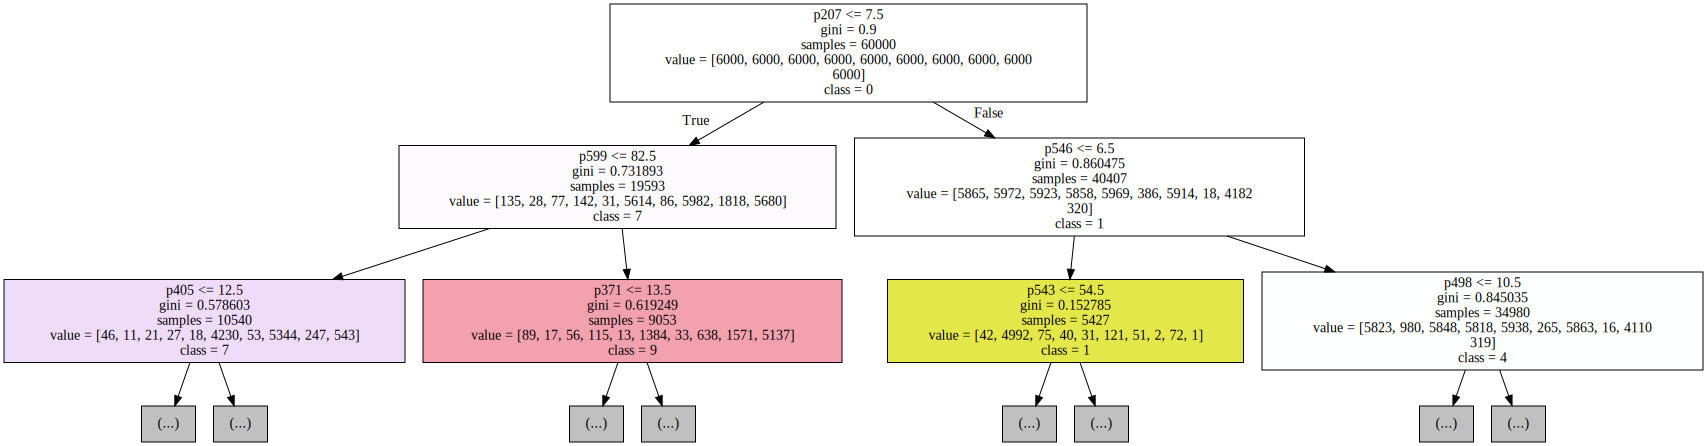

In [65]:
import visualizations_ml as vml
vml.plot_decision_tree(clf_best,
                       feature_names=feature_names,
                       max_depth = 2
                      )

Using method: impurity_decrease
Time for importances = 0.0010037422180175781


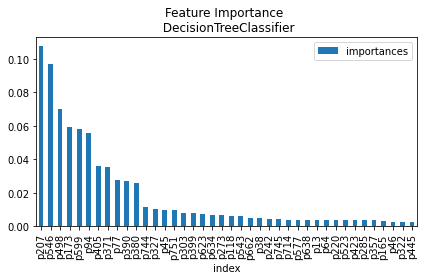

In [69]:
vml.plot_feature_importance(
    clf_best,
    feature_names=feature_names,
    title=f"Feature Importance \n {model_name}",
    n_features_to_plot=40
)

# Plotting Map of the Feature Importance

In [70]:
f_import = sklm.feature_importances(clf_best,return_std=False)

Using method: impurity_decrease
Time for importances = 0.0008516311645507812


<AxesSubplot:title={'center':'DecisionTreeClassifier Pixel Feature Importance'}>

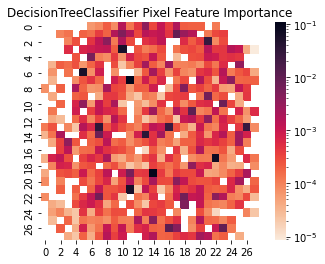

In [78]:
import seaborn_ml as sml
sml.heatmap(f_import.reshape(28,28),logscale=True,title=f"{model_name} Pixel Feature Importance")

In [80]:
n_hidden_layers = 3
np.linspace(32 * 32 * 3, 10, n_hidden_layers + 2, dtype=int)

array([3072, 2306, 1541,  775,   10])